<a href="https://colab.research.google.com/github/ericyoc/ml_portfolio/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#logistic regression

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, jaccard_score, log_loss
import matplotlib.pyplot as plt

In [7]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [9]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
def plot_logistic_regression(X, y, model, title):
    plt.figure(figsize=(8, 6))

    # Create a mesh grid of points
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Calculate the decision boundary
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the predicted probabilities
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    # Plot the logistic regression line
    x_values = np.array([x_min, x_max])
    y_values = -(model.intercept_[0] + model.coef_[0][0] * x_values) / model.coef_[0][1]
    plt.plot(x_values, y_values, 'k-', lw=2)

    plt.xlabel('Tenure (Feature 1)')
    plt.ylabel('Age (Feature 2)')
    plt.title(title)
    plt.show()

In [30]:
def main():
    # Load data
    churn_df = pd.read_csv("ml_data/ChurnData.csv")
    print("Churn Dataset Head:")
    print(churn_df.head())
    print()

    # Data pre-processing and selection
    churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'churn']]
    churn_df['churn'] = churn_df['churn'].astype('int')
    print("Selected Columns:")
    print(churn_df.head())
    print("Dataset Shape:", churn_df.shape)
    print()

    # Define X and y using only the first two features
    X = np.asarray(churn_df[['tenure', 'age']])
    print("X (First 5 rows):")
    print(X[0:5])
    print()

    y = np.asarray(churn_df['churn'])
    print("y (First 5 elements):")
    print(y[0:5])
    print()

    # Normalize the dataset
    X = preprocessing.StandardScaler().fit(X).transform(X)
    print("Normalized X (First 5 rows):")
    print(X[0:5])
    print()

    # Train and test dataset split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
    print('Train Set Shape:', X_train.shape, y_train.shape)
    print('Test Set Shape:', X_test.shape, y_test.shape)
    print()

    # Modeling: Logistic Regression
    LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
    print("Logistic Regression Model:")
    print(LR)
    print()

    # Predict
    yhat = LR.predict(X_test)
    print("Predicted labels:")
    print(yhat)
    print()

    yhat_prob = LR.predict_proba(X_test)
    print("Predicted Probabilities:")
    print(yhat_prob)
    print()

    # Plot logistic regression
    plot_logistic_regression(X_train, y_train, LR, 'Figure 1: Logistic Regression')
    print("Explanation:")
    print("The plot shows the decision boundary of the logistic regression model trained on the 'tenure' and 'age' features.")
    print("The x-axis represents the 'tenure' feature (Feature 1), and the y-axis represents the 'age' feature (Feature 2).")
    print("The background color represents the predicted probabilities, and the scatter points represent the actual customer churn status.")
    print("The black line represents the logistic regression decision boundary.")
    print()

    # Evaluation
    print("Jaccard Score:", jaccard_score(y_test, yhat, pos_label=0))
    print()

    # Confusion matrix
    cnf_matrix = confusion_matrix(y_test, yhat, labels=[1, 0])
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure(figsize=(8, 6))
    plt.title("Figure 2: Confusion Matrix")
    plot_confusion_matrix(cnf_matrix, classes=['churn=1', 'churn=0'], normalize=False, title='Confusion Matrix')
    plt.show()
    print("Explanation:")
    print("The confusion matrix shows the model's performance in terms of true positives, true negatives, false positives, and false negatives.")
    print("It helps evaluate the model's ability to correctly classify customer churn.")
    print()

    print("Classification Report:")
    print(classification_report(y_test, yhat))
    print()

    print("Log Loss:", log_loss(y_test, yhat_prob))
    print()

    # Build Logistic Regression model with different solver and regularization values
    LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train, y_train)
    yhat_prob2 = LR2.predict_proba(X_test)
    print("LogLoss (LR2): %.2f" % log_loss(y_test, yhat_prob2))

Churn Dataset Head:
   tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0    11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1    33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2    23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3    38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4     7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   

   longmon  ...  pager  internet  callwait  confer  ebill  loglong  logtoll  \
0     4.40  ...    1.0       0.0       1.0     1.0    0.0    1.482    3.033   
1     9.45  ...    0.0       0.0       0.0     0.0    0.0    2.246    3.240   
2     6.30  ...    0.0       0.0       0.0     1.0    0.0    1.841    3.240   
3     6.05  ...    1.0       1.0       1.0     1.0    1.0    1.800    3.807   
4     7.10  ...    0.0       0.0       1.0     1.0    0.0    1.960    3.091   

   lninc  custcat  churn  
0  4.913      4.0    

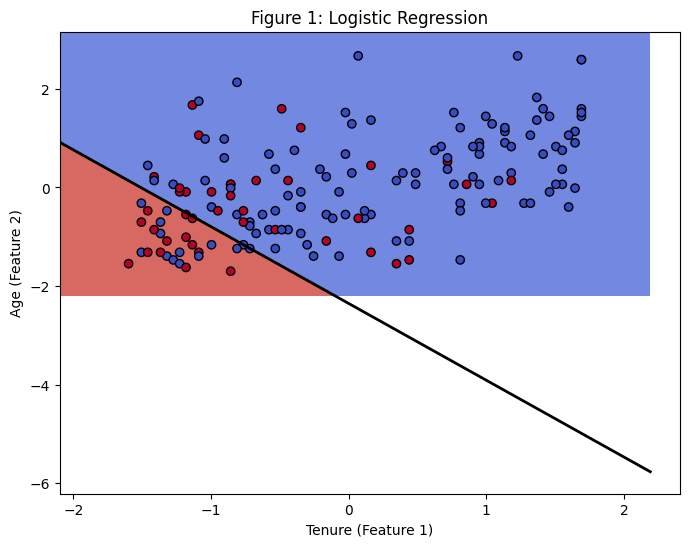

Explanation:
The plot shows the decision boundary of the logistic regression model trained on the 'tenure' and 'age' features.
The x-axis represents the 'tenure' feature (Feature 1), and the y-axis represents the 'age' feature (Feature 2).
The background color represents the predicted probabilities, and the scatter points represent the actual customer churn status.
The black line represents the logistic regression decision boundary.

Jaccard Score: 0.6388888888888888

Confusion matrix, without normalization
[[ 4 11]
 [ 2 23]]


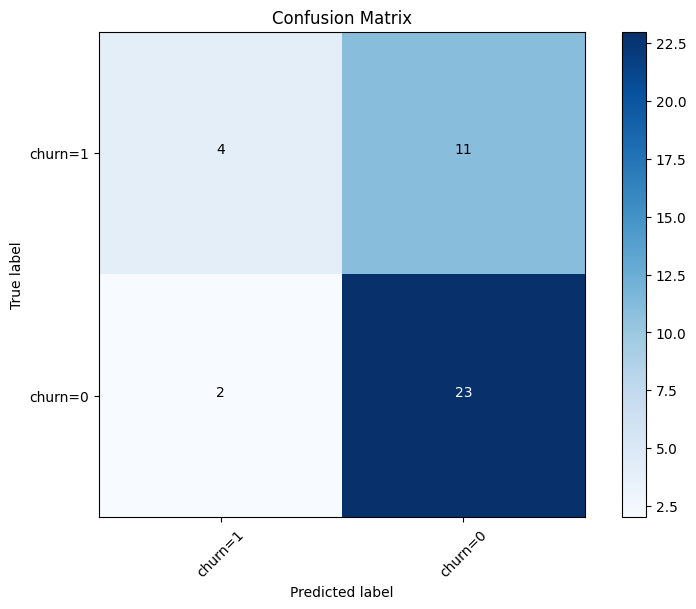

Explanation:
The confusion matrix shows the model's performance in terms of true positives, true negatives, false positives, and false negatives.
It helps evaluate the model's ability to correctly classify customer churn.

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.92      0.78        25
           1       0.67      0.27      0.38        15

    accuracy                           0.68        40
   macro avg       0.67      0.59      0.58        40
weighted avg       0.67      0.68      0.63        40


Log Loss: 0.6225698473729026

LogLoss (LR2): 0.64


In [31]:
if __name__ == "__main__":
    main()